<a href="https://colab.research.google.com/github/lucasnaza1/Road-Traffic-Accidents/blob/main/Road_Traffic_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carregando** **e** **Analisando** **os** **dados**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregando base de dados
df = pd.read_csv("RTA Dataset.csv")

# Visualizando informações iniciais
print("Formato do Dataset:", df.shape)
print("Colunas:", df.columns)
df.head()

# Estatísticas iniciais
print(df.info())
print(df.describe())

# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Contando valores únicos na variável alvo
print(df['Type_of_collision'].value_counts())


Formato do Dataset: (12316, 32)
Colunas: Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------

# **Análise** **Exploratória**

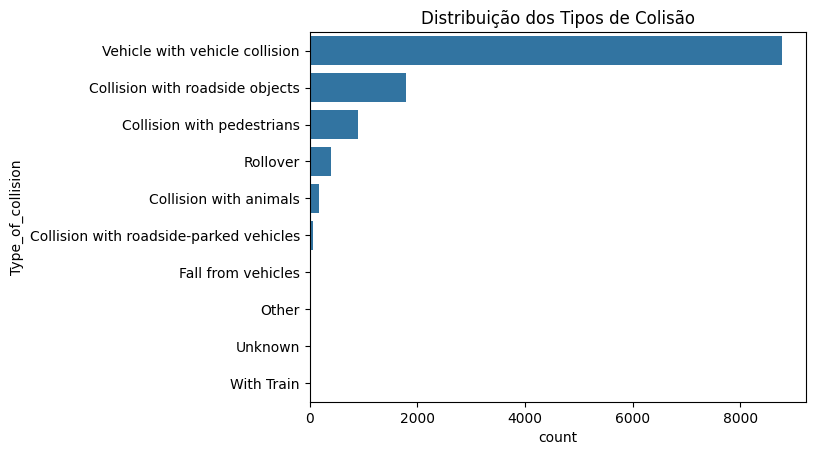

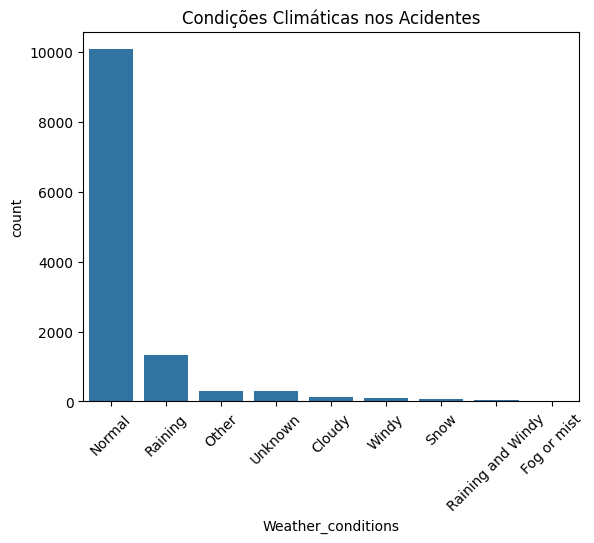

In [ ]:
# Distribuição da variável alvo
sns.countplot(data=df, y='Type_of_collision', order=df['Type_of_collision'].value_counts().index)
plt.title("Distribuição dos Tipos de Colisão")
plt.show()

# Análise de uma variável categórica
sns.countplot(data=df, x='Weather_conditions', order=df['Weather_conditions'].value_counts().index)
plt.title("Condições Climáticas nos Acidentes")
plt.xticks(rotation=45)
plt.show()


# **Pré-Processamento**

In [ ]:
# Remoção de valores ausentes
df = df.dropna()

# Codificação de variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separação das variáveis X e Y
X = df_encoded.drop(columns=['Type_of_collision_Vehicle with vehicle collision'])  # Ajuste com base nos dummies gerados
y = df_encoded['Type_of_collision_Vehicle with vehicle collision']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Treinamento Inicial do Modelo**

In [ ]:
# Modelo básico: Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaliação inicial
y_pred = model.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Acurácia inicial:", accuracy_score(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

       False       1.00      0.96      0.98       154
        True       0.99      1.00      0.99       424

    accuracy                           0.99       578
   macro avg       0.99      0.98      0.99       578
weighted avg       0.99      0.99      0.99       578

Acurácia inicial: 0.9896193771626297


# **Otimização de Hiperparâmetros**

In [ ]:
# Implementação de Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
print("Melhores parâmetros:", grid_search.best_params_)

# Avaliação do modelo otimizado
y_pred_optimized = best_model.predict(X_test)
print("Relatório de Classificação (Modelo Otimizado):\n", classification_report(y_test, y_pred_optimized))
print("Acurácia após otimização:", accuracy_score(y_test, y_pred_optimized))


Melhores parâmetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Relatório de Classificação (Modelo Otimizado):
               precision    recall  f1-score   support

       False       1.00      0.95      0.98       154
        True       0.98      1.00      0.99       424

    accuracy                           0.99       578
   macro avg       0.99      0.98      0.98       578
weighted avg       0.99      0.99      0.99       578

Acurácia após otimização: 0.9878892733564014


# **Validação Cruzada**

In [ ]:
# Avaliação com K-Fold Cross Validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Média de acurácia com validação cruzada:", np.mean(cv_scores))


Média de acurácia com validação cruzada: 0.9799283970903072


## **Criando** **Repositório**

In [17]:
!git clone https://github.com/lucasnaza1/Road-Traffic-Accidents.git

fatal: destination path 'Road-Traffic-Accidents' already exists and is not an empty directory.


In [19]:
import shutil

# Move um arquivo do Colab para o repositório
import shutil
shutil.move('https://colab.research.google.com/drive/1e0BhA7btbLLzkqRec3H1E-WzXDfuKMKO#scrollTo=AX9i6Jj9i1hj', '/lucasnaza1/Road-Traffic-Accidents.git')

FileNotFoundError: [Errno 2] No such file or directory: 'https://colab.research.google.com/drive/1e0BhA7btbLLzkqRec3H1E-WzXDfuKMKO?usp=sharing'